# C0 stress field Approach

In [1]:
import sys
sys.path.insert(0,"/home/nico/Documents/TEAR/Codes_TEAR/PythonCodes/LibFolder")
sys.path.insert(0,"/home/nico/Documents/TEAR/Codes_TEAR/se2dr/se2wave/utils/python")
from Lib_GeneralFunctions import *
from Lib_GeneralSignalProcNAnalysis import *
from Lib_SigmoidProcessing import *
import pandas as pd
from matplotlib.gridspec import GridSpec

In [2]:
# Save into a class the 
class SSCreference:
    def __init__(self, filename, coordinates, RefSource="SEM2DPACK"):
        
        line = pd.read_csv(filename.format("slip"), header=None)
        self.Time = line[0]
        self.Slip = line[1]
        
        line = pd.read_csv(filename.format("sr"), header=None)
        self.SlipRate = line[1]
        
        self.Coord = coordinates #Only used for labels and printing
        self.RefSource = RefSource
    #end __init__
    
    # Default object printing information
    def __repr__(self):
        return "The TPV3reference object was generated from: {} and the receiver is located at {}".format(self.RefSource, self.Coord)
    #end __repr__
    
    def __str__(self):
        return "The TPV3reference object was generated from: {} and the receiver is located at {}".format(self.RefSource, self.Coord)
    #end __str__
    
    def PlotReference(self, ax, SlipSlipRate, filtering=True, **kwargs):
        
        if SlipSlipRate=="Slip":
            if(filtering):
                ax.plot(self.Time, Butterworth(self.Slip, **kwargs), label = "", c = "k", ls = "--", zorder=1)
            else:
                ax.plot(self.Time, self.Slip, label = "", c = "k", ls = "--", zorder=1)
        elif SlipSlipRate=="SlipRate":
            if(filtering):
                ax.plot(self.Time, Butterworth(self.SlipRate, **kwargs), label = "", c = "k", ls = "--", zorder=1)
            else:
                ax.plot(self.Time, self.SlipRate, label = "", c = "k", ls = "--", zorder=1)
            
        return ax

    
def GenericFigAxis():
    fig = plt.figure(figsize=[15,5])
    gs = GridSpec(1, 2)

    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    
    
    return fig, [ax1, ax2]
    
def format_axes(fig):
    """
    Format a figure and 4 equidistant reveivers' lines from a single file. Receiver distance defines the color.
    """
    for i, ax in enumerate(fig.axes):
        ax.set_xlim(-0.5,4)
        ax.set_ylim(-0.5,8)
        ax.set_xlabel("time(s)")
        
    Lines = fig.axes[-1].get_lines()
    
    legend2 = fig.axes[-1].legend(Lines, ['2km','4km', '6km', '8km'], loc=1)
    fig.axes[-1].add_artist(legend2)
    fig.axes[-1].set_ylabel("Slip Rate (m/s)")
    fig.axes[0].set_ylabel("Slip (m)")

def Multi_format_axes(fig,cmap, LabelsPerColor):
    """
    Format a figure that contains different files with 
    information from several receivers for simulations under sets of blending parameters.
    """
    ColorDict = dict(enumerate(LabelsPerColor)) 
    
    
    for i, ax in enumerate(fig.axes):
        ax.set_xlim(-0.5,4)
        ax.set_ylim(-0.5,8)
        ax.set_xlabel("time(s)")
    Lines = []
    for idx,colcol in enumerate(cmap.colors):
        Lines.append(mlines.Line2D([], [], color = colcol,
                     linewidth = 3, label = ColorDict.get(idx)))
    
    legend2 = fig.axes[-1].legend(Lines, LabelsPerColor, loc = 2)
    fig.axes[-1].add_artist(legend2)
    fig.axes[-1].set_ylabel("Slip Rate (m/s)")
    fig.axes[0].set_ylabel("Slip (m)")
    
    

In [3]:
path = "/home/nico/Documents/TEAR/Codes_TEAR/ProfilePicking/Output/"
# Reference saved into a list of objects
RefList = [SSCreference(path + "Reference/sem2dpack/sem2d-{}-1.txt", "2km"),
           SSCreference(path + "Reference/sem2dpack/sem2d-{}-2.txt", "4km"),
           SSCreference(path + "Reference/sem2dpack/sem2d-{}-3.txt", "6km"),
           SSCreference(path + "Reference/sem2dpack/sem2d-{}-4.txt", "8km"),
          ]

In [7]:
from matplotlib.colors import ListedColormap
import matplotlib.lines as mlines
from palettable.cartocolors.qualitative import Safe_6

cmap = ListedColormap(Safe_6.mpl_colors[:])

# Sigmoid data

In [20]:
FolderSigmoidPath = "/home/nico/Documents/TEAR/Codes_TEAR/PythonCodes/[SSC]Sigmoid/ProcessedData/"




ListOfFileNames = ["20210622-P2_P1_050x050-50.05",
                   "20210622-P3_P1_025x025-25.025"]


Delta1 = ListOfFileNames[:]
SigmoidFiles1 = [LoadPickleFile(FolderSigmoidPath, fname) for fname in Delta1]

[FaultData Object, distance 2000 - half thickness 50.05, FaultData Object, distance 4000 - half thickness 50.05, FaultData Object, distance 6000 - half thickness 50.05, FaultData Object, distance 8000 - half thickness 50.05]
[FaultData Object, distance 2000 - half thickness 25.025, FaultData Object, distance 4000 - half thickness 25.025, FaultData Object, distance 6000 - half thickness 25.025, FaultData Object, distance 8000 - half thickness 25.025]


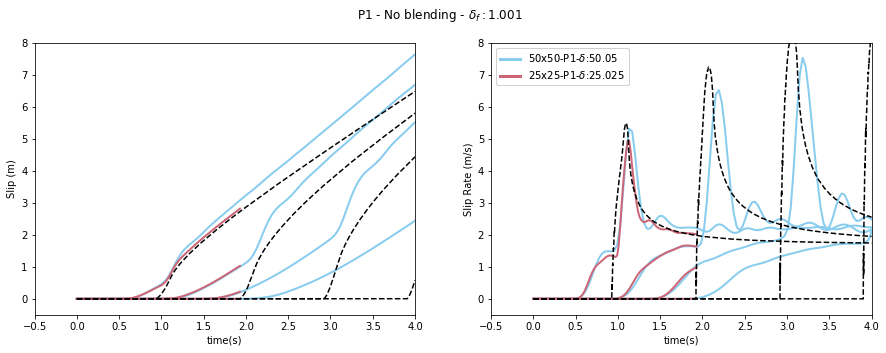

In [21]:
fig, axis = GenericFigAxis()

# Sigmoid case plotting
for iidx,SFile in enumerate(SigmoidFiles1):
    print(SFile)
    for Test1 in SFile:
        axis[0].plot(Test1.Time, Test1.Slip, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
        axis[1].plot(Test1.Time, Test1.SlipRate, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 
        


LabelsPerColor= ["50x50-P1-$\delta$:50.05", "25x25-P1-$\delta$:25.025"]

Multi_format_axes(fig, cmap, LabelsPerColor)
fig.suptitle("P1 - No blending - $\delta_f: 1.001$")
[item.PlotReference(axis[0], "Slip", filtering=False) for item in RefList]
[item.PlotReference(axis[1], "SlipRate", filtering=False) for item in RefList]
plt.show()


# Tilted case

In [14]:
FolderTiltedPath = "/media/nico/Elements/ToPlot/20210706-TiltingNew/"


TiltedFile1 = LoadPickleFile(Filename = "Tilted20degCont_P8_P1_050x050-Tilt20.0-P1-TPList_t1131_d50.05.pickle",
                             FolderPath = FolderTiltedPath)
TiltedFile2 = LoadPickleFile(Filename = "Tilted20DegCont_P9_P1_025x025-Tilt20.0-P1-TPList_t1130_d25.025.pickle",
                            FolderPath = FolderTiltedPath)

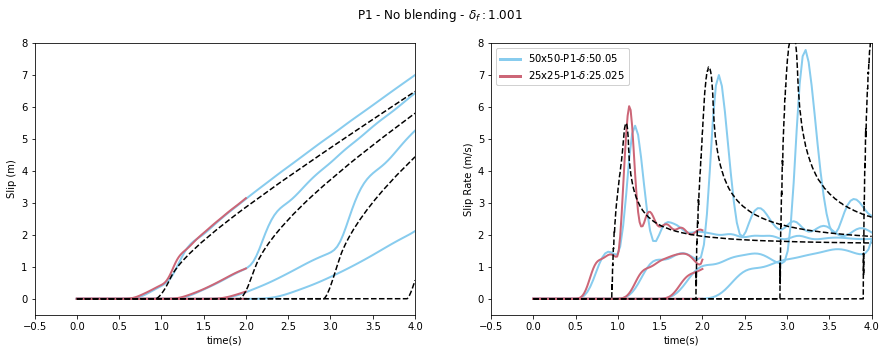

In [18]:
fig, axis = GenericFigAxis()


# Tilted case plotting


iidx = 0
for Test1 in TiltedFile1[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 
    
iidx = 1
for Test1 in TiltedFile2[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 

    

LabelsPerColor= ["50x50-P1-$\delta$:50.05", "25x25-P1-$\delta$:25.025"]

Multi_format_axes(fig, cmap, LabelsPerColor)
fig.suptitle("P1 - No blending - $\delta_f: 1.001$")
[item.PlotReference(axis[0], "Slip", filtering=False) for item in RefList]
[item.PlotReference(axis[1], "SlipRate", filtering=False) for item in RefList]
plt.show()
